In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 9.9 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 72.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 33.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 12.3 MB/s eta 0:00:01


In [2]:
df = pd.read_csv('mobile_train.csv')
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

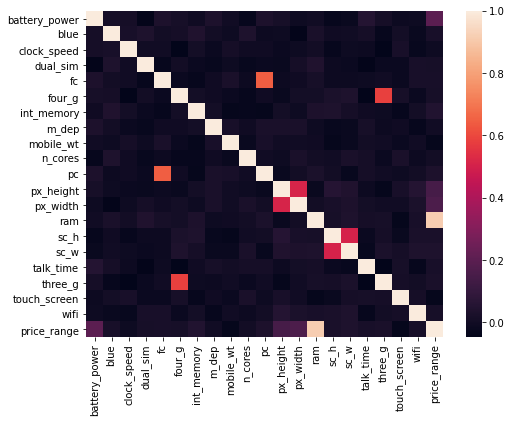

In [3]:
corr = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr)

In [4]:
df['bluetooth']=np.where(df["blue"]==1,'Yes','No')

In [70]:
def conv_gen(x):
    converter = {4:0,0:2,3:3,7:4}
    return converter[x]

def conv_speed(x):
    if x < 1:
        return 'low'
    elif x < 2.3:
        return 'medium'
    return 'high'

def conv_cores(x):
    converter = {1:'single',2:"dual",3:"triple",4:"quad",5:"penta",6:"hexa",7:"hepta",8:"octa"}
    return converter[x]

def conv_wifi(x):
    res = "none"
    c = ['b','b','a']
    if x > 0:
        c.extend(['a','a','b','a','g'])
    if x > 1:
        c.extend(['a','a','g','g','n'])
    if x > 0:
        c.extend(['g','g','g','n','n','n','n'])
    if x != -1:
        res = np.random.choice(c)
    converter = {0:'b',1:"a",2:"g",3:"n",-1:"none"}
    return res

def conv_price(x):
    if x > 15:
        return 1 if np.random.random() > 0.6 else 0
    return 0

In [6]:
df['gen_tmp'] = df["four_g"]*4+df["three_g"]*3
df['gen'] = df['gen_tmp'].apply(conv_gen)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,No,0,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,Yes,7,4
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,Yes,7,4
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,Yes,3,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,Yes,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,13,4,19,1,1,0,0,Yes,7,4
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,11,10,16,1,1,1,2,Yes,3,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,9,1,5,1,1,0,3,No,7,4
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,18,10,19,1,1,1,0,No,7,4


(array([413.,  74.,  64.,  58.,  58.,  61., 107.,   0.,  68.,  70.,  67.,
        136.,   0., 127.,   0.,  67.,  76.,  59., 136.,   0.,  74.,  55.,
        140.,  62.,  28.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
        1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 25 artists>)

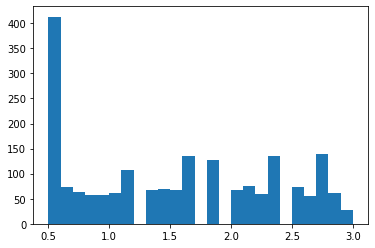

In [7]:
plt.hist(df.clock_speed,bins=25)

In [8]:
df['speed'] = df['clock_speed'].apply(conv_speed)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen,speed
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,No,0,2,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,Yes,7,4,low
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,Yes,7,4,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,Yes,3,3,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,Yes,7,4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,4,19,1,1,0,0,Yes,7,4,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,10,16,1,1,1,2,Yes,3,3,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1,5,1,1,0,3,No,7,4,low
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,10,19,1,1,1,0,No,7,4,low


In [9]:
df['sim'] = np.where(df['dual_sim'] == 0, 'Single','Dual')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen,speed,sim
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,No,0,2,medium,Single
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,Yes,7,4,low,Dual
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,Yes,7,4,low,Dual
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,Yes,3,3,high,Single
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,Yes,7,4,medium,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,19,1,1,0,0,Yes,7,4,low,Dual
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,16,1,1,1,2,Yes,3,3,high,Dual
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,5,1,1,0,3,No,7,4,low,Dual
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,19,1,1,1,0,No,7,4,low,Single


In [10]:
df['f_camera'] = np.where(df['fc']==0,np.NaN,df['fc'])
df['camera'] = np.where(df['pc']==0,np.NaN,df['pc'])
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen,speed,sim,f_camera,camera
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,No,0,2,medium,Single,1.0,2.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1,0,2,Yes,7,4,low,Dual,NaN,6.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1,0,2,Yes,7,4,low,Dual,2.0,6.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,0,2,Yes,3,3,high,Single,NaN,9.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1,0,1,Yes,7,4,medium,Single,13.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1,0,0,Yes,7,4,low,Dual,NaN,14.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1,1,2,Yes,3,3,high,Dual,NaN,3.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1,0,3,No,7,4,low,Dual,1.0,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,1,1,0,No,7,4,low,Single,4.0,5.0


In [11]:
df.int_memory.count()

2000

In [12]:
df['memory'] = df.int_memory*1000 + np.round(np.random.normal(500,250,size =df.int_memory.count())).astype(int)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,bluetooth,gen_tmp,gen,speed,sim,f_camera,camera,memory
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,0,2,medium,Single,1.0,2.0,7424
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,7,4,low,Dual,NaN,6.0,53379
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,7,4,low,Dual,2.0,6.0,41144
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,3,3,high,Single,NaN,9.0,10759
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,7,4,medium,Single,13.0,14.0,44694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,0,0,Yes,7,4,low,Dual,NaN,14.0,2534
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1,2,Yes,3,3,high,Dual,NaN,3.0,38955
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,0,3,No,7,4,low,Dual,1.0,3.0,36689
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,1,0,No,7,4,low,Single,4.0,5.0,46630


In [26]:
df['dpi_w'] = df['px_width']/df['sc_w']*2.5
df['dpi_h'] = df['px_height']/df['sc_h']*2.5

df[['dpi_h','dpi_w','px_height','px_width','sc_h','sc_w']]

,dpi_h,dpi_w,px_height,px_width,sc_h,sc_w
0,5.555556,270.000000,20,756,9,7
1,133.088235,1656.666667,905,1988,17,3
2,287.045455,2145.000000,1263,1716,11,2
3,190.000000,558.125000,1216,1786,16,8
4,377.500000,1515.000000,1208,1212,8,2
...,...,...,...,...,...,...
1995,235.000000,1181.250000,1222,1890,13,4
1996,207.954545,491.250000,915,1965,11,10
1997,241.111111,4080.000000,868,1632,9,1
1998,46.666667,167.500000,336,670,18,10


In [28]:
df['screen']=np.where(df["touch_screen"]==1,'Touch','LCD')
df

In [41]:
df["wifi_tmp"] = np.where(df.wifi==0,-1,df["price_range"])
df['wifi_class']= df['wifi_tmp'].apply(conv_wifi)
df[["wifi_tmp","wifi",'price_range','wifi_class']]

,wifi_tmp,wifi,price_range,wifi_class
0,1,1,1,g
1,-1,0,2,none
2,-1,0,2,none
3,-1,0,2,none
4,-1,0,1,none
...,...,...,...,...
1995,-1,0,0,none
1996,2,1,2,b
1997,-1,0,3,none
1998,0,1,0,b


<AxesSubplot:xlabel='wifi_class', ylabel='price_range'>

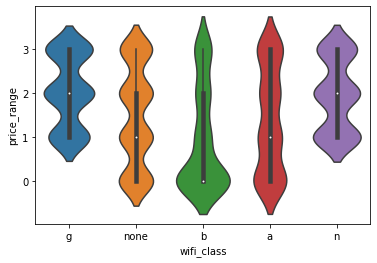

In [42]:
sns.violinplot(x='wifi_class',y='price_range',data=df)

In [43]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'bluetooth', 'gen_tmp', 'gen',
       'speed', 'sim', 'f_camera', 'camera', 'memory', 'dpi', 'dpi_w', 'dpi_h',
       'screen', 'wifi_tmp', 'wifi_class'],
      dtype='object')

In [44]:
df_out = df[['battery_power','m_dep', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'bluetooth', 'gen',
       'speed', 'sim', 'f_camera', 'camera', 'memory', 'screen', 'wifi_class', 'price_range']]
df_out

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,bluetooth,gen,speed,sim,f_camera,camera,memory,screen,wifi_class,price_range
0,842,0.6,188,20,756,2549,9,7,19,No,2,medium,Single,1.0,2.0,7424,LCD,g,1
1,1021,0.7,136,905,1988,2631,17,3,7,Yes,4,low,Dual,NaN,6.0,53379,Touch,none,2
2,563,0.9,145,1263,1716,2603,11,2,9,Yes,4,low,Dual,2.0,6.0,41144,Touch,none,2
3,615,0.8,131,1216,1786,2769,16,8,11,Yes,3,high,Single,NaN,9.0,10759,LCD,none,2
4,1821,0.6,141,1208,1212,1411,8,2,15,Yes,4,medium,Single,13.0,14.0,44694,Touch,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.8,106,1222,1890,668,13,4,19,Yes,4,low,Dual,NaN,14.0,2534,Touch,none,0
1996,1965,0.2,187,915,1965,2032,11,10,16,Yes,3,high,Dual,NaN,3.0,38955,Touch,b,2
1997,1911,0.7,108,868,1632,3057,9,1,5,No,4,low,Dual,1.0,3.0,36689,Touch,none,3
1998,1512,0.1,145,336,670,869,18,10,19,No,4,low,Single,4.0,5.0,46630,Touch,b,0


(array([203., 188., 154., 208., 234., 169., 189., 180., 181., 193.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

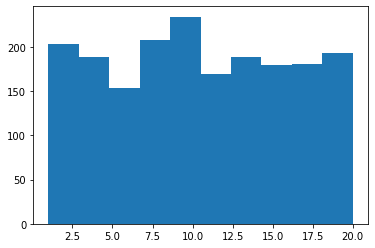

In [46]:
plt.hist(df.camera)

In [75]:
df['price_range_2'] = df['price_range']+df.camera.apply(conv_price)

In [76]:
df[['price_range_2',"price_range"]]

,price_range_2,price_range
0,1,1
1,2,2
2,2,2
3,2,2
4,1,1
...,...,...
1995,0,0
1996,2,2
1997,3,3
1998,0,0


<AxesSubplot:>

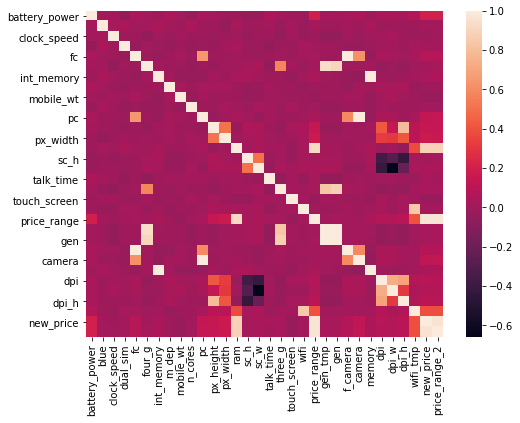

In [77]:
corr2 = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr2)

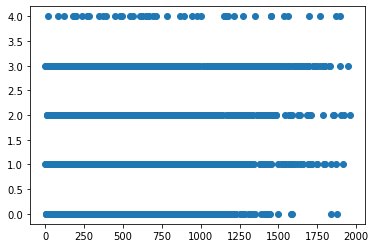

In [69]:
plt.plot(df["px_height"],df["new_price"],'o')

In [78]:
df_out = df[['battery_power','m_dep', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'bluetooth', 'gen',
       'speed', 'sim', 'f_camera', 'camera', 'memory', 'screen', 'wifi_class', 'price_range','price_range_2']]
df_out

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,bluetooth,gen,speed,sim,f_camera,camera,memory,screen,wifi_class,price_range,price_range_2
0,842,0.6,188,20,756,2549,9,7,19,No,2,medium,Single,1.0,2.0,7424,LCD,g,1,1
1,1021,0.7,136,905,1988,2631,17,3,7,Yes,4,low,Dual,NaN,6.0,53379,Touch,none,2,2
2,563,0.9,145,1263,1716,2603,11,2,9,Yes,4,low,Dual,2.0,6.0,41144,Touch,none,2,2
3,615,0.8,131,1216,1786,2769,16,8,11,Yes,3,high,Single,NaN,9.0,10759,LCD,none,2,2
4,1821,0.6,141,1208,1212,1411,8,2,15,Yes,4,medium,Single,13.0,14.0,44694,Touch,none,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.8,106,1222,1890,668,13,4,19,Yes,4,low,Dual,NaN,14.0,2534,Touch,none,0,0
1996,1965,0.2,187,915,1965,2032,11,10,16,Yes,3,high,Dual,NaN,3.0,38955,Touch,b,2,2
1997,1911,0.7,108,868,1632,3057,9,1,5,No,4,low,Dual,1.0,3.0,36689,Touch,none,3,3
1998,1512,0.1,145,336,670,869,18,10,19,No,4,low,Single,4.0,5.0,46630,Touch,b,0,0


<AxesSubplot:>

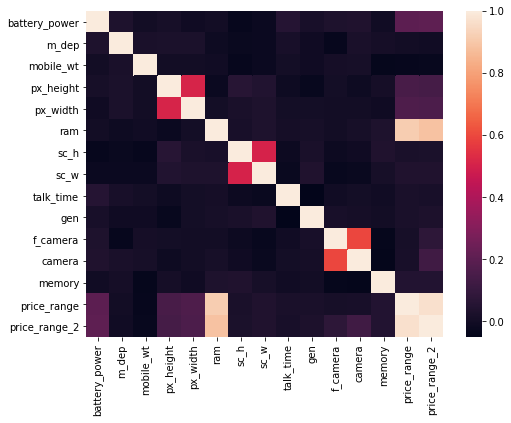

In [80]:
corr_new = df_out.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_new)